<h2 style='color:blue' align="center">KNN (K Nearest Neighbors) Classification</h2>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')
df.shape

(400, 5)

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:xlabel='Purchased', ylabel='count'>

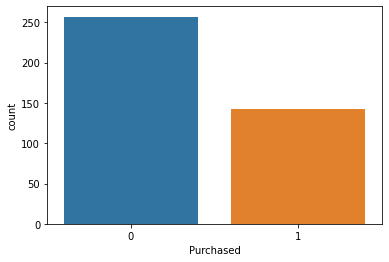

In [11]:
sns.countplot(x = "Purchased" ,data = df )

<AxesSubplot:title={'center':'Heat map of Correlation'}>

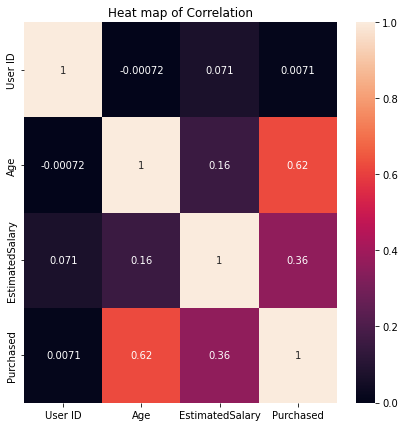

In [12]:
plt.figure(figsize=(7,7))
plt.title('Heat map of Correlation')
sns.heatmap(data=df.corr(), annot= True)

### Converting Categorical data to Num using LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
dfle = df 
dfle.Gender = le.fit_transform(dfle.Gender)
dfle

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


#### Split data as X & Y

In [15]:
X = df.iloc[:,[1,2,3]].values
y = df.iloc[:,4].values

In [16]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

##### Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 10)

In [19]:
X_train

array([[     1,     28,  79000],
       [     0,     28,  85000],
       [     0,     41,  72000],
       [     1,     60,  34000],
       [     0,     46,  82000],
       [     1,     47,  34000],
       [     0,     33,  69000],
       [     1,     26,  15000],
       [     1,     36, 144000],
       [     1,     35,  38000],
       [     1,     31,  18000],
       [     0,     52, 114000],
       [     1,     34,  43000],
       [     1,     25,  80000],
       [     1,     53,  72000],
       [     1,     45,  26000],
       [     1,     37,  53000],
       [     1,     60, 102000],
       [     0,     32, 117000],
       [     1,     42,  80000],
       [     0,     49,  36000],
       [     1,     47,  20000],
       [     0,     50,  36000],
       [     0,     35,  77000],
       [     1,     31,  58000],
       [     1,     42,  64000],
       [     1,     43, 129000],
       [     1,     45,  22000],
       [     1,     29,  43000],
       [     0,     58,  95000],
       [  

In [20]:
X_test

array([[     1,     42,  65000],
       [     0,     37,  71000],
       [     0,     42,  90000],
       [     0,     47,  47000],
       [     0,     23,  48000],
       [     0,     58,  23000],
       [     1,     39,  42000],
       [     1,     47,  43000],
       [     1,     35,  59000],
       [     0,     39,  71000],
       [     1,     41,  59000],
       [     0,     26, 118000],
       [     1,     59, 130000],
       [     0,     57,  26000],
       [     1,     46,  23000],
       [     1,     38,  71000],
       [     0,     28,  87000],
       [     1,     24,  58000],
       [     1,     30,  15000],
       [     1,     39, 122000],
       [     0,     27,  54000],
       [     1,     21,  72000],
       [     1,     37,  75000],
       [     0,     59,  88000],
       [     0,     58,  47000],
       [     1,     37,  55000],
       [     1,     38,  59000],
       [     0,     37, 146000],
       [     1,     48,  33000],
       [     1,     36,  33000],
       [  

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
knn.score(X_test, y_test)

0.89

In [24]:
knn.predict([[1,19,19000]])

array([0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[69,  0],
       [11, 20]], dtype=int64)

Text(42.0, 0.5, 'Truth')

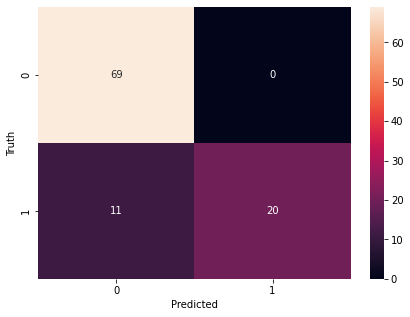

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        69
           1       1.00      0.65      0.78        31

    accuracy                           0.89       100
   macro avg       0.93      0.82      0.86       100
weighted avg       0.91      0.89      0.88       100

